In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xlsx =  pd.ExcelFile('KPMG_VI_New_raw_data_update_final (1).xlsx')
df_tr = pd.read_excel(xlsx, header=1, sheet_name='Transactions')

In [3]:
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
df_nc = pd.read_excel(xlsx, header=1, sheet_name='NewCustomerList')
df_nc.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1599729628.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_nc = pd.read_excel(xlsx, header=1, sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [5]:
df_cd = pd.read_excel(xlsx, header=1, sheet_name='CustomerDemographic')
df_cd.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\3745449374.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_cd = pd.read_excel(xlsx, header=1, sheet_name='CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
df_add = pd.read_excel(xlsx, header=1, sheet_name='CustomerAddress')
df_add.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
df_cd = df_cd.drop(['first_name', 'last_name', 'default', 'job_title'], axis=1)
df_cd['gender'].replace(['F', 'Femal'], 'Female', inplace=True)
df_cd['gender'].replace('M', 'Male', inplace=True)
df_cd['gender'].replace('U', 'Unknown', inplace=True)
df_cd['deceased_indicator'].replace(['N'], 0, inplace=True)
df_cd['deceased_indicator'].replace(['Y'], 1, inplace=True)
df_cd['owns_car'].replace('Yes', 1, inplace=True)
df_cd['owns_car'].replace('No', 0, inplace=True)
df_cd = df_cd[df_cd['DOB'] != df_cd.DOB.min()]
df_cd[df_cd['deceased_indicator'] == 0]
df_cd = df_cd.drop(['deceased_indicator'], axis=1)
df_cd_clean = df_cd.dropna()
df_cd_clean.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0


In [8]:
df_cd_clean['age'] = (dt.datetime.now() - df_cd_clean['DOB']) / np.timedelta64(1, 'Y')
df_cd_clean['age'] =df_cd_clean['age'].astype('int')
df_cd_clean['age_class'] = ((round(df_cd_clean['age'] / 10)) * 10).astype(int)
df_cd_clean.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2137666445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_clean['age'] = (dt.datetime.now() - df_cd_clean['DOB']) / np.timedelta64(1, 'Y')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2137666445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_clean['age'] =df_cd_clean['age'].astype('int')
C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\2137666445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class
0,1,Female,93,1953-10-12,Health,Mass Customer,1,11.0,68,70
1,2,Male,81,1980-12-16,Financial Services,Mass Customer,1,16.0,41,40
2,3,Male,61,1954-01-20,Property,Mass Customer,1,15.0,68,70
3,4,Male,33,1961-10-03,IT,Mass Customer,0,7.0,60,60
5,6,Male,35,1966-09-16,Retail,High Net Worth,1,13.0,56,60


In [9]:
df_add['state'].replace('New South Wales', 'NSW', inplace=True)
df_add['state'].replace('Victoria', 'VIC', inplace=True)
df_add['property_valuation'] = df_add['property_valuation'].astype('int')
df_add.drop(columns=['country'],inplace =True)
df_add_clean = df_add.dropna()
df_add_clean.head()

,customer_id,address,postcode,state,property_valuation
0,1,060 Morning Avenue,2016,NSW,10
1,2,6 Meadow Vale Court,2153,NSW,10
2,4,0 Holy Cross Court,4211,QLD,9
3,5,17979 Del Mar Point,2448,NSW,4
4,6,9 Oakridge Court,3216,VIC,9


In [10]:
df_tr.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [11]:
df_tr.duplicated().sum()

0

In [12]:
df_tr.sort_values('customer_id')
df_tr.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [13]:
df_tr['product_first_sold_date'] = pd.TimedeltaIndex(df_tr['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [14]:
most_recent_purchase = df_tr['transaction_date'].max()
df_tr['last_purchase_days_ago'] = most_recent_purchase - df_tr['transaction_date']
df_tr['last_purchase_days_ago'] /= np.timedelta64(1, 'D')

In [15]:
df_tr.drop(columns=['transaction_date', 'online_order', 'order_status', 'product_id','standard_cost', 'list_price', 'product_first_sold_date'], inplace =True)

In [16]:
df_tr.sort_values('customer_id')
df_tr.head()

,transaction_id,customer_id,brand,product_line,product_class,product_size,last_purchase_days_ago
0,1,2950,Solex,Standard,medium,medium,308.0
1,2,3120,Trek Bicycles,Standard,medium,large,223.0
2,3,402,OHM Cycles,Standard,low,medium,75.0
3,4,3135,Norco Bicycles,Standard,medium,medium,121.0
4,5,787,Giant Bicycles,Standard,medium,large,90.0


In [17]:
cust_df = df_cd_clean.merge(df_add_clean,how='inner', on='customer_id')
cust_df = df_tr.merge(cust_df,how='inner', on='customer_id')
cust_df.head()

,transaction_id,customer_id,brand,product_line,product_class,product_size,last_purchase_days_ago,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,age,age_class,address,postcode,state,property_valuation
0,1,2950,Solex,Standard,medium,medium,308.0,Male,19,1955-01-11,Financial Services,Mass Customer,1,10.0,67,70,984 Hoepker Court,3064,VIC,6
1,11065,2950,Giant Bicycles,Standard,medium,medium,75.0,Male,19,1955-01-11,Financial Services,Mass Customer,1,10.0,67,70,984 Hoepker Court,3064,VIC,6
2,18923,2950,Solex,Standard,medium,medium,248.0,Male,19,1955-01-11,Financial Services,Mass Customer,1,10.0,67,70,984 Hoepker Court,3064,VIC,6
3,2,3120,Trek Bicycles,Standard,medium,large,223.0,Female,89,1979-02-04,Health,Mass Customer,1,10.0,43,40,4 Shopko Circle,2196,NSW,5
4,6862,3120,Giant Bicycles,Standard,high,medium,86.0,Female,89,1979-02-04,Health,Mass Customer,1,10.0,43,40,4 Shopko Circle,2196,NSW,5


In [18]:
cust_df['gender'].shape

(16291,)

In [22]:
df_nc = pd.read_excel(xlsx, header=1, sheet_name='NewCustomerList')
df_nc.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10676\1599729628.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df_nc = pd.read_excel(xlsx, header=1, sheet_name='NewCustomerList')


,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [23]:
df_nc = df_nc.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','country','Unnamed: 19','Unnamed: 20', 'last_name', 'job_title', 'first_name'], axis=1)
df_nc = df_nc.dropna()
df_nc['deceased_indicator'].replace(['N'], 0, inplace=True)
df_nc['deceased_indicator'].replace(['Y'], 1, inplace=True)
df_nc['owns_car'].replace('Yes', 1, inplace=True)
df_nc['owns_car'].replace('No', 0, inplace=True)
df_nc = df_nc[df_nc['DOB'] != df_nc.DOB.min()]
df_nc[df_nc['deceased_indicator'] == 0]
df_nc_clean = df_nc.drop(['deceased_indicator'], axis=1)
df_nc_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value
0,Male,86,1957-07-12,Manufacturing,Mass Customer,1,14,45 Shopko Center,4500,QLD,6,1,1.718750
1,Male,69,1970-03-22,Property,Mass Customer,0,16,14 Mccormick Park,2113,NSW,11,1,1.718750
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,10,5 Colorado Crossing,3505,VIC,5,1,1.718750
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,1,5,207 Annamark Plaza,4814,QLD,1,4,1.703125
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,19,115 Montana Place,2093,NSW,9,4,1.703125


In [24]:
df_nc_clean['age'] = (dt.datetime.now() - df_nc_clean['DOB']) / np.timedelta64(1, 'Y')
df_nc_clean['age'] =df_nc_clean['age'].astype('int')
df_nc_clean['age_class'] = ((round(df_nc_clean['age'] / 10)) * 10).astype(int)
df_nc_clean.head()

,gender,past_3_years_bike_related_purchases,DOB,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,property_valuation,Rank,Value,age,age_class
0,Male,86,1957-07-12,Manufacturing,Mass Customer,1,14,45 Shopko Center,4500,QLD,6,1,1.718750,65,60
1,Male,69,1970-03-22,Property,Mass Customer,0,16,14 Mccormick Park,2113,NSW,11,1,1.718750,52,50
2,Female,10,1974-08-28,Financial Services,Affluent Customer,0,10,5 Colorado Crossing,3505,VIC,5,1,1.718750,48,50
3,Female,64,1979-01-28,Manufacturing,Affluent Customer,1,5,207 Annamark Plaza,4814,QLD,1,4,1.703125,43,40
4,Female,34,1965-09-21,Financial Services,Affluent Customer,0,19,115 Montana Place,2093,NSW,9,4,1.703125,57,60


### Data Visualization

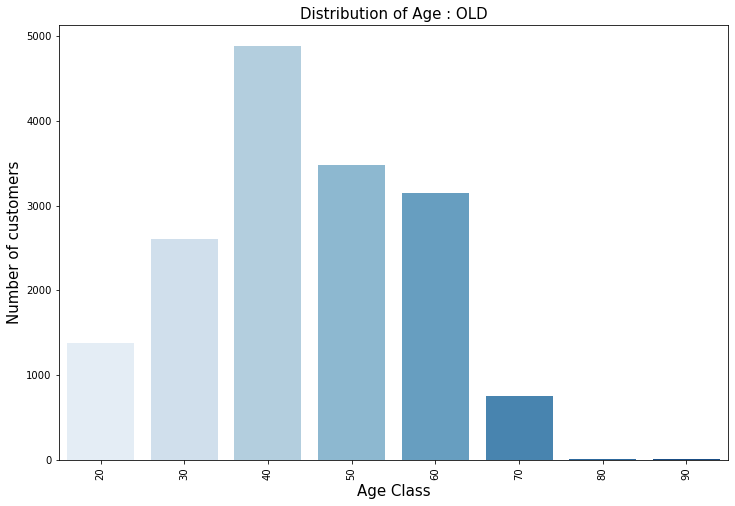

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(data=cust_df,x ='age_class', palette = 'Blues')
plt.title('Distribution of Age : OLD', fontsize = 15);
plt.xlabel('Age Class', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.xticks(rotation=90) ;

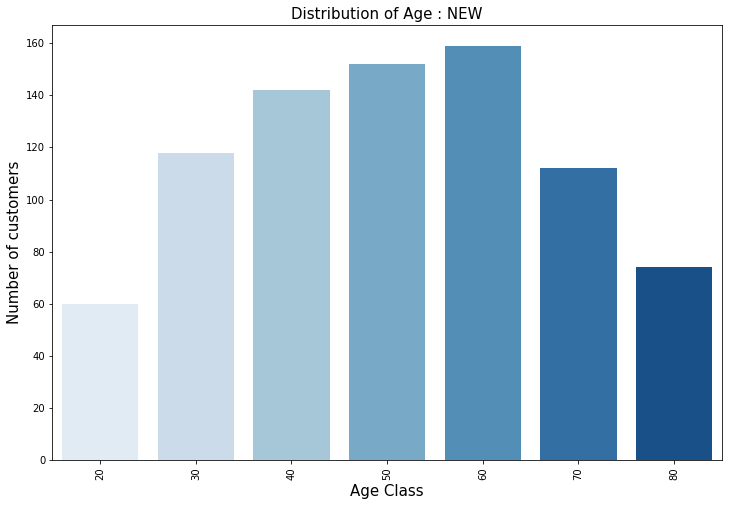

In [26]:
plt.figure(figsize=(12,8))

sns.countplot(data=df_nc_clean,x ='age_class' ,palette = 'Blues')
plt.title('Distribution of Age : NEW', fontsize = 15);
plt.xlabel('Age Class', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.xticks(rotation=90) ;

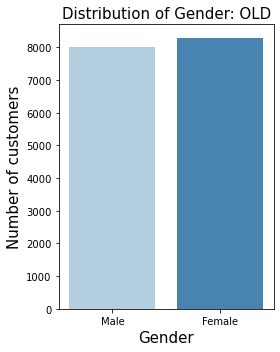

In [27]:
plt.figure(figsize=[4,5])
sns.countplot(x='gender', data=cust_df, palette = 'Blues');
plt.title('Distribution of Gender: OLD', fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

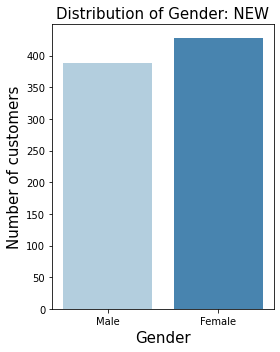

In [28]:
plt.figure(figsize=[4,5])
sns.countplot(x='gender', data=df_nc_clean, palette = 'Blues');
plt.title('Distribution of Gender: NEW', fontsize = 15);
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

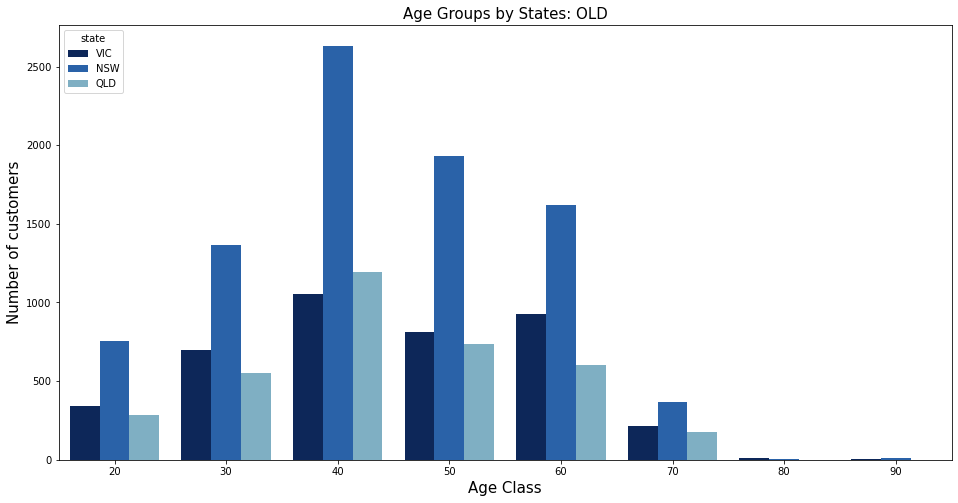

In [29]:
fig = plt.figure(figsize=(16,8))
sns.countplot(data=cust_df, x='age_class', hue='state',  palette= ["#002366","#1560BD", "#74B3CE"])
plt.xlabel('Age Class', fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)
plt.title('Age Groups by States: OLD', fontsize = 15);

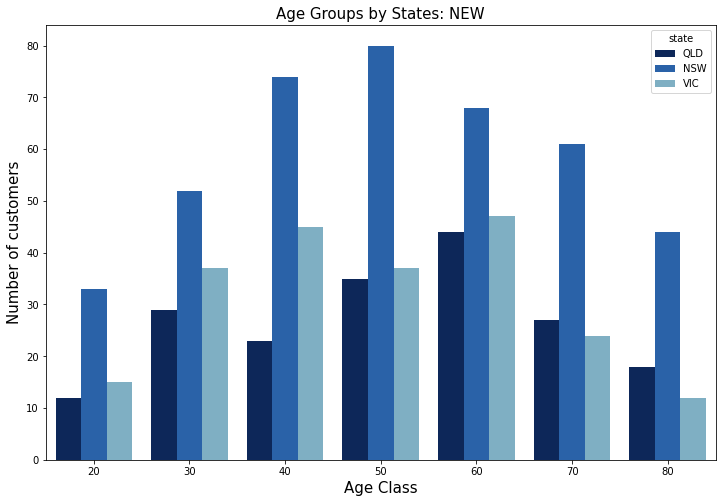

In [30]:
fig = plt.figure(figsize=(12,8))
sns.countplot(data=df_nc_clean, x='age_class', hue='state',  palette= ["#002366","#1560BD", "#74B3CE"])
plt.xlabel('Age Class', fontsize = 15)
plt.ylabel('Number of customers', fontsize = 15)
plt.title('Age Groups by States: NEW', fontsize = 15);

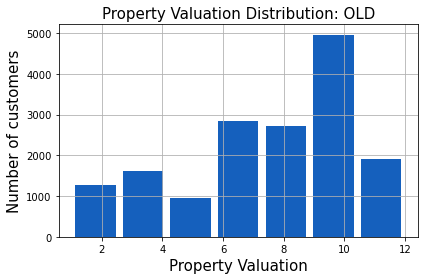

In [31]:
fig = plt.figure(figsize = (6,4))
axes = fig.gca()
cust_df.hist('property_valuation', bins=7, ax=axes, color="#1560BD", rwidth=0.85, alpha=1);
plt.title('Property Valuation Distribution: OLD', fontsize = 15);
plt.xlabel('Property Valuation', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

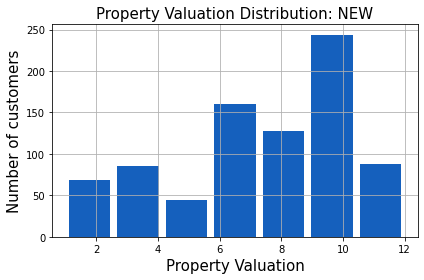

In [32]:
fig = plt.figure(figsize = (6,4))
axes = fig.gca()
df_nc_clean.hist('property_valuation', bins=7, ax=axes, color="#1560BD", rwidth=0.85, alpha=1);
plt.title('Property Valuation Distribution: NEW', fontsize = 15);
plt.xlabel('Property Valuation', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

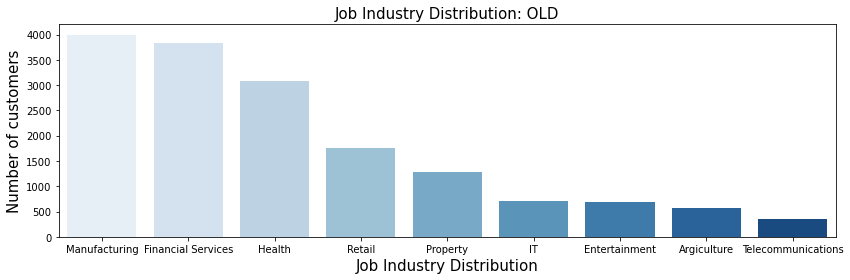

In [33]:
fig = plt.figure(figsize = (12,4))
sns.countplot(x ='job_industry_category', data=cust_df, palette ='Blues', order = cust_df['job_industry_category'].value_counts().index);
plt.title('Job Industry Distribution: OLD', fontsize = 15);
plt.xlabel('Job Industry Distribution', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

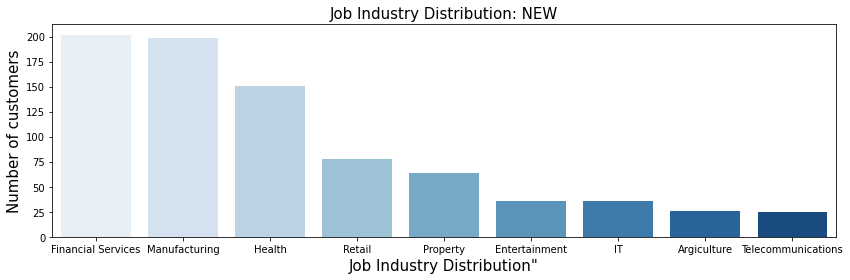

In [34]:
fig = plt.figure(figsize = (12,4))
sns.countplot(x ='job_industry_category', data=df_nc_clean, palette ='Blues', order = df_nc_clean['job_industry_category'].value_counts().index);
plt.title('Job Industry Distribution: NEW', fontsize = 15);
plt.xlabel('Job Industry Distribution"', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

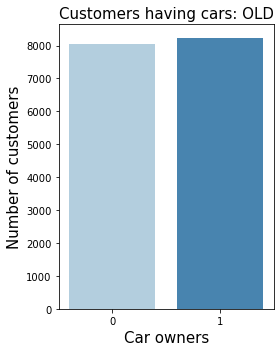

In [35]:
plt.figure(figsize=[4,5])
sns.countplot(x='owns_car', data=cust_df, palette ='Blues');
plt.title('Customers having cars: OLD', fontsize = 15);
plt.xlabel('Car owners', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

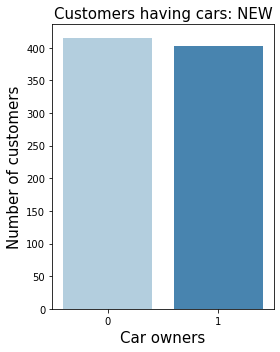

In [36]:
plt.figure(figsize=[4,5])
sns.countplot(x='owns_car', data=df_nc_clean, palette ='Blues');
plt.title('Customers having cars: NEW', fontsize = 15);
plt.xlabel('Car owners', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

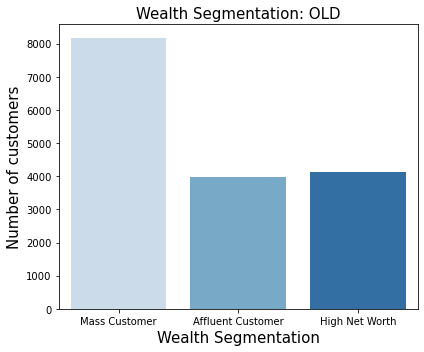

In [37]:
plt.figure(figsize=[6,5])
sns.countplot(x='wealth_segment', data=cust_df, palette ='Blues');
plt.title('Wealth Segmentation: OLD', fontsize = 15);
plt.xlabel('Wealth Segmentation', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()

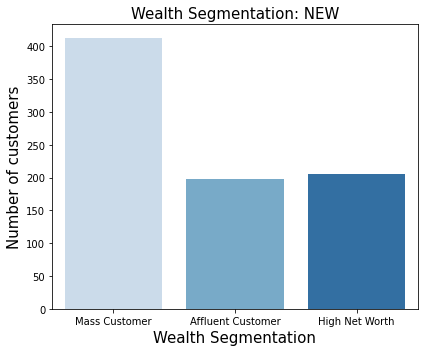

In [38]:
plt.figure(figsize=[6,5])
sns.countplot(x='wealth_segment', data=df_nc_clean, palette ='Blues');
plt.title('Wealth Segmentation: NEW', fontsize = 15);
plt.xlabel('Wealth Segmentation', fontsize = 15);
plt.ylabel('Number of customers', fontsize = 15)
plt.tight_layout()